In [161]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import numpy as np
import neurospyke as ns
from scipy.io import loadmat
import os
import json
from sklearn.decomposition import PCA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [162]:
f = open('settings.json')
settings = json.load(f)
f.close()

resampling_frequency = settings['resampling_frequency']
resampling_time = 1 / resampling_frequency

group = settings['group']
subject = settings['subject']
conditions = settings['conditions']
areas = list(settings['areas'].keys())
n_channels = settings['n_channels']
n_stimuli = settings['n_stimuli']
n_components = settings['n_PCA_components']
trial_duration = settings['trial_duration_view']
trial_samples = np.round(trial_duration * resampling_frequency).astype(np.int_)
trial_range = np.arange(trial_samples).astype(np.int_)

data = loadmat(os.path.join('./output', group, subject, subject + '.mat'))
IFR = data['data']

In [163]:
NPD = np.zeros([np.size(conditions), np.size(areas), n_components, np.size(IFR, axis=3), trial_samples])

In [164]:
# PCA for comparisons of the same area pre and post lesion: rototranslation matrix fixed for the area
for area_idx in np.arange(np.size(areas)):
    IFR_trials = IFR[:, area_idx, :, :, 0:trial_samples]
    IFR_mean_trials = np.mean(IFR_trials, axis=0)
    IFR_mean_trials = np.mean(IFR_mean_trials, axis=1)

    my_pca = PCA(n_components)
    my_pca.fit(np.transpose(IFR_mean_trials))

    for condition_idx in np.arange(np.size(conditions)):
        for trial_idx in np.arange(n_stimuli):
            NPD[condition_idx, area_idx, :, trial_idx, :] = np.transpose(
                my_pca.transform(
                    np.transpose(IFR_trials[condition_idx, :, trial_idx, :])
                )
            )

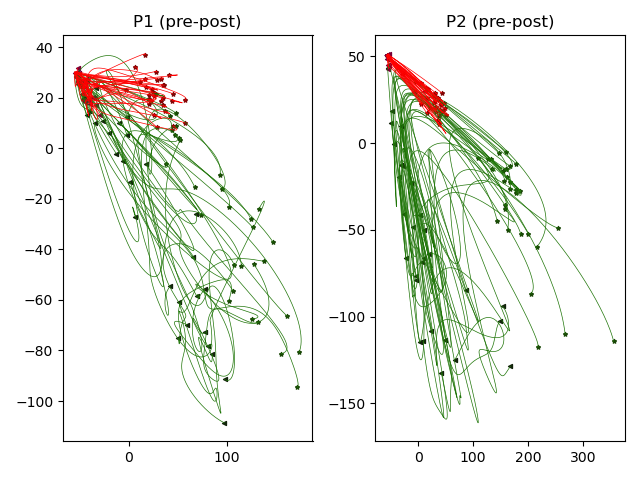

In [165]:
# NPD for comparisons of the same area pre and post lesion
fig = ns.visualization.pyplot.figure()
axs_titles = ['P1 (pre-post)', 'P2 (pre-post)']

if n_components == 3:
    axs = [fig.add_subplot(121, projection='3d'), fig.add_subplot(122, projection='3d')]
else:
    axs = [fig.add_subplot(121), fig.add_subplot(122)]

colors = ['#1F7508', '#FF0000']
colors_markers = [['#194706', '#12230B'], ['#800606', '#780037']]

for condition_idx in np.arange(np.size(conditions)):
    color = colors[condition_idx]
    for area_idx in np.arange(np.size(areas)):
        ax = axs[area_idx]
        for trial_idx in np.arange(n_stimuli):
            if n_components == 3:
                ax.plot(
                    NPD[condition_idx, area_idx, 0, trial_idx, trial_range],
                    NPD[condition_idx, area_idx, 1, trial_idx, trial_range],
                    NPD[condition_idx, area_idx, 2, trial_idx, trial_range],
                    color=color,
                    linewidth=0.5
                )
                ax.scatter(
                    NPD[condition_idx, area_idx, 0, trial_idx, trial_range[0]], 
                    NPD[condition_idx, area_idx, 1, trial_idx, trial_range[0]], 
                    NPD[condition_idx, area_idx, 2, trial_idx, trial_range[0]],
                    color=colors_markers[condition_idx][0],
                    s=8,
                    marker='*',

                )
                ax.scatter(
                    NPD[condition_idx, area_idx, 0, trial_idx, trial_range[-1]], 
                    NPD[condition_idx, area_idx, 1, trial_idx, trial_range[-1]], 
                    NPD[condition_idx, area_idx, 2, trial_idx, trial_range[-1]],
                    color=colors_markers[condition_idx][1],
                    s=8,
                    marker='<'
                )
            else:    
                ax.plot(
                    NPD[condition_idx, area_idx, 0, trial_idx, trial_range],
                    NPD[condition_idx, area_idx, 1, trial_idx, trial_range],
                    color=color,
                    linewidth=0.5
                )
                ax.scatter(
                    NPD[condition_idx, area_idx, 0, trial_idx, trial_range[0]], 
                    NPD[condition_idx, area_idx, 1, trial_idx, trial_range[0]],
                    color=colors_markers[condition_idx][0],
                    s=8,
                    marker='*',

                )
                ax.scatter(
                    NPD[condition_idx, area_idx, 0, trial_idx, trial_range[-1]], 
                    NPD[condition_idx, area_idx, 1, trial_idx, trial_range[-1]],
                    color=colors_markers[condition_idx][1],
                    s=8,
                    marker='<'
                )
        
        ax.set_title(axs_titles[area_idx])

ns.visualization.pyplot.tight_layout()

In [166]:
# PCA for comparisons of the same condition for P1 and P2 areas: rototranslation matrix fixed for the condition
for condition_idx in np.arange(np.size(conditions)):
    IFR_trials = IFR[condition_idx, :, :, :, 0:trial_samples]
    IFR_mean_trials = np.mean(IFR_trials, axis=0)
    IFR_mean_trials = np.mean(IFR_mean_trials, axis=1)

    my_pca = PCA(n_components)
    my_pca.fit(np.transpose(IFR_mean_trials))

    for area_idx in np.arange(np.size(areas)):
        for trial_idx in np.arange(n_stimuli):
            NPD[condition_idx, area_idx, :, trial_idx, :] = np.transpose(
                my_pca.transform(
                    np.transpose(IFR_trials[area_idx, :, trial_idx, :])
                )
            )

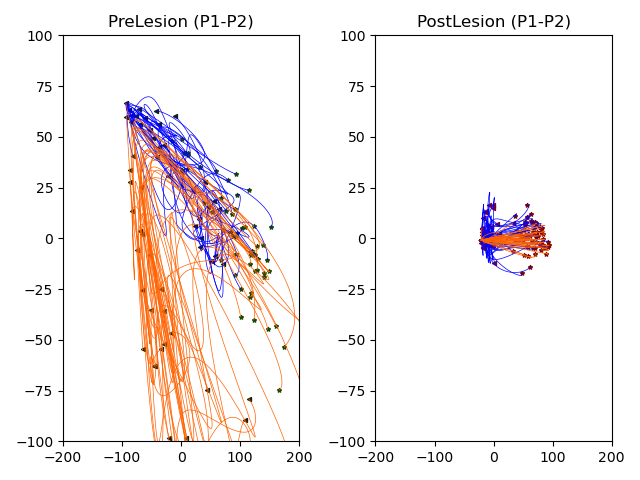

In [168]:
# NPD for comparisons of the same condition for P1 and P2 areas
fig = ns.visualization.pyplot.figure()
axs_titles = ['PreLesion (P1-P2)', 'PostLesion (P1-P2)']

if n_components == 3:
    axs = [fig.add_subplot(121, projection='3d'), fig.add_subplot(122, projection='3d')]
else:
    axs = [fig.add_subplot(121), fig.add_subplot(122)]

colors = ['#0000FF', '#FF6200']
colors_markers = [['#194706', '#12230B'], ['#800606', '#780037']]

for area_idx in np.arange(np.size(areas)):
    color = colors[area_idx]
    for condition_idx in np.arange(np.size(conditions)):
        ax = axs[condition_idx]
        for trial_idx in np.arange(n_stimuli):
            if n_components == 3:
                ax.plot(
                    NPD[condition_idx, area_idx, 0, trial_idx, trial_range],
                    NPD[condition_idx, area_idx, 1, trial_idx, trial_range],
                    NPD[condition_idx, area_idx, 2, trial_idx, trial_range],
                    color=color,
                    linewidth=0.5
                )
                ax.scatter(
                    NPD[condition_idx, area_idx, 0, trial_idx, trial_range[0]], 
                    NPD[condition_idx, area_idx, 1, trial_idx, trial_range[0]], 
                    NPD[condition_idx, area_idx, 2, trial_idx, trial_range[0]],
                    color=colors_markers[condition_idx][0],
                    s=8,
                    marker='*',

                )
                ax.scatter(
                    NPD[condition_idx, area_idx, 0, trial_idx, trial_range[-1]], 
                    NPD[condition_idx, area_idx, 1, trial_idx, trial_range[-1]], 
                    NPD[condition_idx, area_idx, 2, trial_idx, trial_range[-1]],
                    color=colors_markers[condition_idx][1],
                    s=8,
                    marker='<'
                )
            else:    
                ax.plot(
                    NPD[condition_idx, area_idx, 0, trial_idx, trial_range],
                    NPD[condition_idx, area_idx, 1, trial_idx, trial_range],
                    color=color,
                    linewidth=0.5
                )
                ax.scatter(
                    NPD[condition_idx, area_idx, 0, trial_idx, trial_range[0]], 
                    NPD[condition_idx, area_idx, 1, trial_idx, trial_range[0]],
                    color=colors_markers[condition_idx][0],
                    s=8,
                    marker='*',

                )
                ax.scatter(
                    NPD[condition_idx, area_idx, 0, trial_idx, trial_range[-1]], 
                    NPD[condition_idx, area_idx, 1, trial_idx, trial_range[-1]],
                    color=colors_markers[condition_idx][1],
                    s=8,
                    marker='<'
                )
                ax.set_ylim([-100, 100])
                ax.set_xlim([-200, 200])
        
        ax.set_title(axs_titles[condition_idx])

ns.visualization.pyplot.tight_layout()